In this notebook, I select aroung 2K genes that are higly expressed in the endothelial cells from the Zhu et al. 2023 dataset. I will use Pando to fit GLM models for those genes. However, to avoid large memory overhead, i also wrote a function to retrieve the gene names in chunks and fit models for each chunk of genes in Pando. For a chunk of 500 genes, I expect the model-fitting proces to consume around 150G memory. 

I introduced a parameter to the function to set the number of overlapping gene sizes between the subsequent chunk sets. Using this, I will visualize the subnetworks for only those overlapping genes, that were inferred in different Pando processes, as part of different chunks, to compare if there are any or major discrepancies in the inferred network structures. 

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [3]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/24_09_24"

In [4]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [5]:
library(Signac)

In [6]:
library(Pando)


Attaching package: ‘Pando’


The following objects are masked from ‘package:Seurat’:

    GetAssay, VariableFeatures


The following objects are masked from ‘package:SeuratObject’:

    LayerData, VariableFeatures




In [13]:
list.files(here::here('..', '10_04_24', 'R_Objects')) %>% print

[1] "da_peaks_all_logfc_cutoff_0_1_minPCT_0_01.RDS"             
[2] "da_peaks_all_w_gene_names_logfc_cutoff_0_1_minPCT_0_01.RDS"
[3] "DE_genes_logFC_0_1_minPCT_0_01_return_threshold_0_01.RDS"  
[4] "Zhu_et_al_Pando_w_eGRNs.RDS"                               
[5] "Zhu_et_al_Pando_w_motifs.RDS"                              


In [14]:
Zhu_et_al_multiome <- readRDS(here::here('..', '10_04_24', 'R_Objects', 'Zhu_et_al_Pando_w_motifs.RDS'))

In [15]:
Zhu_et_al_multiome

An object of class "GRNData"
Slot "grn":
A RegulatoryNetwork object based on 1014 transcription factors


No network has been inferred

Slot "data":
An object of class Seurat 
364381 features across 45549 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony


In [16]:
Zhu_et_al_multiome_PANDO <- Zhu_et_al_multiome

In [17]:
Zhu_et_al_multiome <- Zhu_et_al_multiome@data

In [18]:
Zhu_et_al_multiome

An object of class Seurat 
364381 features across 45549 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony

In [19]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

In [20]:
Zhu_et_al_multiome@meta.data %>% count(cell_type)

cell_type,n
<fct>,<int>
endothelial cell,754
astrocyte,6245
oligodendrocyte,5459
microglial cell,4528
vascular associated smooth muscle cell,355
inhibitory interneuron,3479
pericyte,677
glutamatergic neuron,13146
radial glial cell,1322


In [29]:
options(repr.plot.width = 16, repr.plot.height = 7)

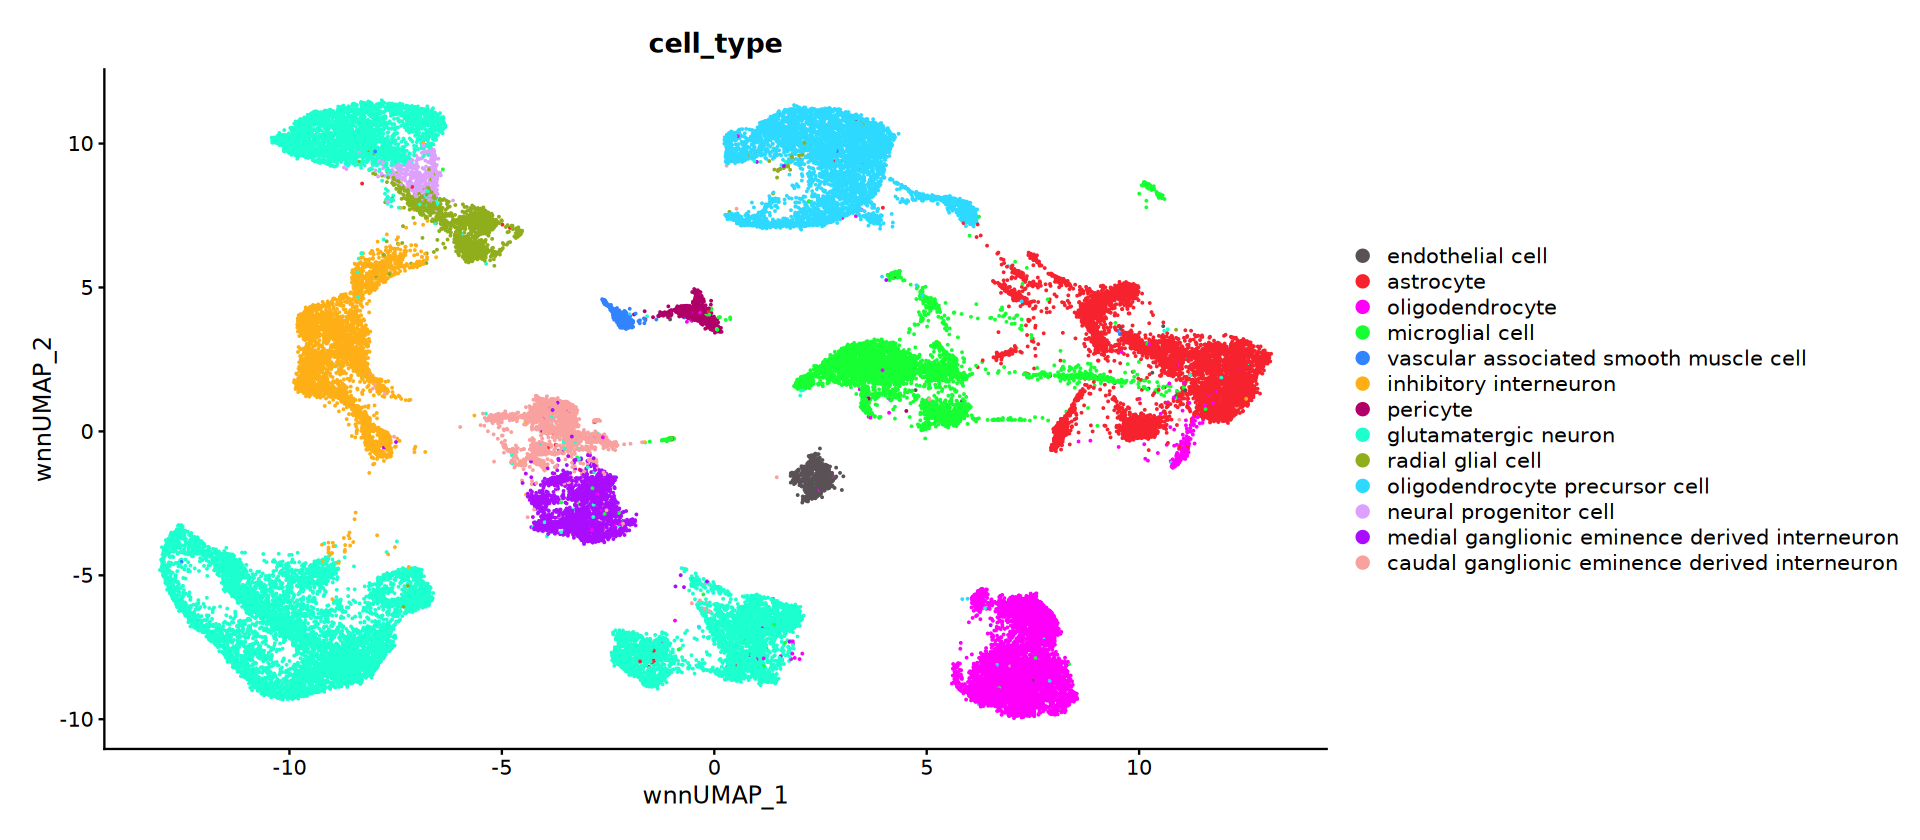

In [38]:
DimPlot(object = Zhu_et_al_multiome, dims = c(1:2), 
        reduction = 'wnn.umap', 
        group.by = 'cell_type', 
        cols = my_colours) + 
theme(plot.margin = unit(c(0.5, 0.75, 0.5, 0.5), "cm")) 

In [39]:
Zhu_et_al_multiome@meta.data %>% names %>% print

 [1] "orig.ident"                              
 [2] "nCount_RNA"                              
 [3] "nFeature_RNA"                            
 [4] "author_cell_type"                        
 [5] "age_group"                               
 [6] "donor_id"                                
 [7] "author_TSS_percentile_from_ATAC"         
 [8] "author_nucleosome_signal_from_ATAC"      
 [9] "assay_ontology_term_id"                  
[10] "cell_type_ontology_term_id"              
[11] "development_stage_ontology_term_id"      
[12] "disease_ontology_term_id"                
[13] "self_reported_ethnicity_ontology_term_id"
[14] "organism_ontology_term_id"               
[15] "sex_ontology_term_id"                    
[16] "tissue_ontology_term_id"                 
[17] "suspension_type"                         
[18] "is_primary_data"                         
[19] "batch"                                   
[20] "tissue_type"                             
[21] "cell_type"                        

In [40]:
# Aggregate expression for the endothelial cells:

In [41]:
Zhu_et_al_multiome

An object of class Seurat 
364381 features across 45549 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony

In [55]:
aggregate_exp <- AggregateExpression(object = Zhu_et_al_multiome, assays = 'SCT', group.by = 'cell_type')

In [56]:
aggregate_exp <- aggregate_exp$SCT

In [57]:
aggregate_exp %>% head

  [[ suppressing 13 column names ‘endothelial cell’, ‘astrocyte’, ‘oligodendrocyte’ ... ]]



6 x 13 sparse Matrix of class "dgCMatrix"
                                                           
AL627309.1  3  43  11  75  .   9  4   84   2  20  1  19   7
AL627309.5  6  94  44 102  2  19  2  179  11  60  .  63  44
AL669831.2  .   2   1   1  .   2  .   13   1   3  .   3   2
LINC01409  58 585 244 545 20 185 51 1540  82 372 16 228 201
FAM87B      .   4   .   2  .   .  .    4   3   .  .   1   .
LINC01128  87 354 123 185 13 374 45 1452 103 148 27 206 183

In [58]:
aggregate_exp_df  <- as.data.frame(aggregate_exp)

In [59]:
aggregate_exp_df %>% head

,endothelial cell,astrocyte,oligodendrocyte,microglial cell,vascular associated smooth muscle cell,inhibitory interneuron,pericyte,glutamatergic neuron,radial glial cell,oligodendrocyte precursor cell,neural progenitor cell,medial ganglionic eminence derived interneuron,caudal ganglionic eminence derived interneuron
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL627309.1,3,43,11,75,0,9,4,84,2,20,1,19,7
AL627309.5,6,94,44,102,2,19,2,179,11,60,0,63,44
AL669831.2,0,2,1,1,0,2,0,13,1,3,0,3,2
LINC01409,58,585,244,545,20,185,51,1540,82,372,16,228,201
FAM87B,0,4,0,2,0,0,0,4,3,0,0,1,0
LINC01128,87,354,123,185,13,374,45,1452,103,148,27,206,183


In [60]:
aggregate_exp_df <- aggregate_exp_df %>% arrange(desc(`endothelial cell`))

In [61]:
aggregate_exp_df %>% head

,endothelial cell,astrocyte,oligodendrocyte,microglial cell,vascular associated smooth muscle cell,inhibitory interneuron,pericyte,glutamatergic neuron,radial glial cell,oligodendrocyte precursor cell,neural progenitor cell,medial ganglionic eminence derived interneuron,caudal ganglionic eminence derived interneuron
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MALAT1,87697,671298,624141,406919,63202,414422,117269,1149602,171009,227604,46119,182240,122626
PTPRG,17387,21889,4162,5319,1537,6364,6237,24615,4083,23678,490,9400,4970
FLT1,17325,216,146,436,2,33,218,125,27,252,3,130,140
ABCB1,11451,221,152,269,5,218,46,1759,18,190,6,236,148
NEAT1,11021,75234,26185,43681,3124,714,7963,2957,835,2233,103,1770,1411
ST6GALNAC3,8739,3141,15147,29420,1161,3164,115,12525,743,962,236,1633,639


In [63]:
sum(aggregate_exp_df$`endothelial cell` > 30)

[1] 8996

In [64]:
sum(aggregate_exp_df$`endothelial cell` > 100)

[1] 4866

In [65]:
sum(aggregate_exp_df$`endothelial cell` > 200)

[1] 2953

In [66]:
sum(aggregate_exp_df$`endothelial cell` > 300)

[1] 2086

In [70]:
Zhu_et_al_multiome_EC <- Zhu_et_al_multiome %>% 
                            subset(subset = cell_type %in% 'endothelial cell')

In [71]:
Zhu_et_al_multiome_EC

An object of class Seurat 
364381 features across 754 samples within 3 assays 
Active assay: SCT (30146 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 2 other assays present: RNA, peaks
 7 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, wnn.umap, pca.harmony, lsi.harmony

In [73]:
Zhu_et_al_multiome_EC@meta.data %>% count(cell_type)

cell_type,n
<fct>,<int>
endothelial cell,754


In [74]:
sum((rowSums(Zhu_et_al_multiome_EC@assays$RNA$counts > 1)) >= 200)

[1] 654

In [85]:
sum((rowSums(Zhu_et_al_multiome_EC@assays$SCT$counts > 1)) >= 200)

[1] 672

In [83]:
# The number of genes with counts greater than 1 in at least 50 cells.

In [84]:
sum((rowSums(Zhu_et_al_multiome_EC@assays$RNA$counts > 1)) >= 50)

[1] 2693

In [86]:
sum((rowSums(Zhu_et_al_multiome_EC@assays$SCT$counts > 1)) >= 50)

[1] 2712

In [88]:
rownames(Zhu_et_al_multiome_EC)[(rowSums(Zhu_et_al_multiome_EC@assays$SCT$counts > 1)) >= 50] %>% head

[1] "CCNL2"  "GNB1"   "SKI"    "CAMTA1" "PER3"   "RERE"

In [89]:
rownames(Zhu_et_al_multiome_EC)[(rowSums(Zhu_et_al_multiome_EC@assays$SCT$counts > 1)) >= 50] %>% sort %>% print

   [1] "A2M"          "AAK1"         "ABCA1"        "ABCB1"       
   [5] "ABCC4"        "ABCD3"        "ABCG2"        "ABHD18"      
   [9] "ABHD2"        "ABI1"         "ABI2"         "ABL1"        
  [13] "ABL2"         "ABLIM1"       "ABLIM3"       "ABR"         
  [17] "AC002070.1"   "AC002460.2"   "AC008014.1"   "AC015631.1"  
  [21] "AC018816.1"   "AC019186.1"   "AC019197.1"   "AC078881.1"  
  [25] "AC079142.1"   "AC079380.1"   "AC080132.1"   "AC092691.1"  
  [29] "AC092957.1"   "AC098617.1"   "AC114757.1"   "AC118549.1"  
  [33] "AC233296.1"   "ACACA"        "ACAP2"        "ACBD6"       
  [37] "ACER2"        "ACER3"        "ACIN1"        "ACSL3"       
  [41] "ACSL4"        "ACSL5"        "ACTB"         "ACTG1"       
  [45] "ACTN1"        "ACTN2"        "ACTN4"        "ACTR2"       
  [49] "ACTR3"        "ACVR1"        "ACVR2A"       "ACYP2"       
  [53] "ADAM10"       "ADAM17"       "ADAMTS6"      "ADAMTS9"     
  [57] "ADAMTS9-AS2"  "ADAR"         "ADARB1"       "ADCY4"   

In [90]:
endothelial_genes <- rownames(Zhu_et_al_multiome_EC)[(rowSums(Zhu_et_al_multiome_EC@assays$SCT$counts > 1)) >= 50]

In [91]:
endothelial_genes %>% length

[1] 2712

In [92]:
aggregate_exp <- aggregate_exp[endothelial_genes,]

In [93]:
aggregate_exp %>% dim

[1] 2712   13

In [94]:
aggregate_exp_df %>% dim

[1] 30146    13

In [95]:
aggregate_exp_df <- as.data.frame(aggregate_exp)

In [99]:
aggregate_exp_df <- aggregate_exp_df %>% arrange(desc(`endothelial cell`))

In [100]:
aggregate_exp_df %>% head

,endothelial cell,astrocyte,oligodendrocyte,microglial cell,vascular associated smooth muscle cell,inhibitory interneuron,pericyte,glutamatergic neuron,radial glial cell,oligodendrocyte precursor cell,neural progenitor cell,medial ganglionic eminence derived interneuron,caudal ganglionic eminence derived interneuron
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MALAT1,87697,671298,624141,406919,63202,414422,117269,1149602,171009,227604,46119,182240,122626
PTPRG,17387,21889,4162,5319,1537,6364,6237,24615,4083,23678,490,9400,4970
FLT1,17325,216,146,436,2,33,218,125,27,252,3,130,140
ABCB1,11451,221,152,269,5,218,46,1759,18,190,6,236,148
NEAT1,11021,75234,26185,43681,3124,714,7963,2957,835,2233,103,1770,1411
ST6GALNAC3,8739,3141,15147,29420,1161,3164,115,12525,743,962,236,1633,639


In [101]:
aggregate_exp_df %>% tail

,endothelial cell,astrocyte,oligodendrocyte,microglial cell,vascular associated smooth muscle cell,inhibitory interneuron,pericyte,glutamatergic neuron,radial glial cell,oligodendrocyte precursor cell,neural progenitor cell,medial ganglionic eminence derived interneuron,caudal ganglionic eminence derived interneuron
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SLC39A11,190,9090,7565,4166,172,366,228,4664,376,875,365,223,394
SEC22A,189,1194,1045,1688,110,1151,205,3108,445,1075,147,623,453
NUBPL,189,2749,2454,1853,174,1531,278,5055,928,2186,208,1002,737
AC078881.1,184,1244,2387,767,108,75,112,514,81,637,11,102,103
NUDCD1,178,363,262,308,23,539,62,2372,210,543,92,299,190
UBE3D,176,1594,1146,1801,118,1011,287,4562,310,2864,111,922,896


In [102]:
endothelial_genes_subsetted <- rownames(aggregate_exp_df)[1:1000]

In [103]:
endothelial_genes_subsetted %>% head

[1] "MALAT1"     "PTPRG"      "FLT1"       "ABCB1"      "NEAT1"     
[6] "ST6GALNAC3"

In [105]:
endothelial_genes_subsetted %>% saveRDS(here::here('R_Objects', 'endothelial_genes_subsetted.RDS'))

In [157]:
endothelial_genes %>% saveRDS(here::here('R_Objects', 'endothelial_genes.RDS'))

In [158]:
endothelial_genes %>% length

[1] 2712

In [159]:
seq(from = 1, to = 2712, by = 1000)

[1]    1 1001 2001

In [160]:
# Function to retrieve elements in chunks of 1000
retrieve_in_chunks <- function(gene_names, chunk_size) {
  
  n <- length(gene_names)  # Fixing the input vector name
  
  chunk_list <- list()  # Initialize an empty list to store chunks
  
  # Iterate over the vector in steps of chunk_size
  for (i in seq(1, n, by = chunk_size)) {
    # Define the chunk range
    chunk <- gene_names[i:min(i + chunk_size - 1, n)]
    
    # Create a name for the chunk (optional, e.g., "chunk_1", "chunk_2")
    chunk_name <- paste0("chunk_", ceiling(i / chunk_size))
    
    # Store the chunk in the list
    chunk_list[[chunk_name]] <- chunk
  }
  
  return(chunk_list)  # Return the list of chunks
}

In [161]:
retrieve_in_chunks(gene_names = endothelial_genes, chunk_size = 500)

$chunk_1
  [1] "CCNL2"      "GNB1"       "SKI"        "CAMTA1"     "PER3"      
  [6] "RERE"       "UBE4B"      "KIF1B"      "MTOR"       "VPS13D"    
 [11] "PRDM2"      "KAZN"       "TMEM51"     "SPEN"       "SRARP"     
 [16] "FBXO42"     "UBR4"       "CAPZB"      "HP1BP3"     "EIF4G3"    
 [21] "ALPL"       "USP48"      "CDC42"      "LUZP1"      "HNRNPR"    
 [26] "ID3"        "RPL11"      "SRSF10"     "CLIC4"      "RSRP1"     
 [31] "ARID1A"     "WASF2"      "IFI6"       "STX12"      "PHACTR4"   
 [36] "EPB41"      "SRSF4"      "PUM1"       "KHDRBS1"    "SFPQ"      
 [41] "ZMYM4"      "KIAA0319L"  "AGO4"       "AGO3"       "THRAP3"    
 [46] "MACF1"      "MFSD2A"     "RLF"        "SCMH1"      "HIVEP3"    
 [51] "FOXJ3"      "YBX1"       "SLC2A1"     "TIE1"       "ST3GAL3"   
 [56] "RNF220"     "RPS8"       "ZSWIM5"     "GPBP1L1"    "MAST2"     
 [61] "PIK3R3"     "FAF1"       "EPS15"      "OSBPL9"     "NRDC"      
 [66] "ZFYVE9"     "TUT4"       "SCP2"       "LRP8"       "TMEM59"    
 [71] "SSBP3"      "USP24"      "DAB1"       "JUN"        "NFIA"      
 [76] "DOCK7"      "ATG4C"      "ROR1"       "CACHD1"     "JAK1"      
 [81] "LEPR"       "PDE4B"      "MIER1"      "WLS"        "LRRC7"     
 [86] "SRSF11"     "ANKRD13C"   "ZRANB2"     "ST6GALNAC3" "AC118549.1"
 [91] "USP33"      "MIGA1"      "FUBP1"      "IFI44L"     "IFI44"     
 [96] "ADGRL4"     "ADGRL2"     "PRKACB"     "CCN1"       "ODF2L"     
[101] "SH3GLB1"    "HS2ST1"     "PKN2"       "GBP4"       "LRRC8B"    
[106] "LRRC8C"     "LRRC8D"     "ZNF644"     "TGFBR3"     "RPAP2"     
[111] "EVI5"       "RPL5"       "MTF2"       "CCDC18-AS1" "FNBP1L"    
[116] "BCAR3"      "ARHGAP29"   "ABCD3"      "CNN3"       "PTBP2"     
[121] "DPYD"       "PLPPR4"     "PALMD"      "MFSD14A"    "CDC14A"    
[126] "SLC30A7"    "S1PR1"      "RNPC3"      "NTNG1"      "STXBP3"    
[131] "SORT1"      "RAP1A"      "CTTNBP2NL"  "CAPZA1"     "SLC16A1"   
[136] "MAGI3"      "TRIM33"     "DENND2C"    "CSDE1"      "ATP1A1"    
[141] "CD58"       "MAN1A2"     "SRGAP2C"    "LINC02798"  "SRGAP2B"   
[146] "RNF115"     "OTUD7B"     "C1orf54"    "RPRD2"      "MCL1"      
[151] "ENSA"       "ARNT"       "POGZ"       "GATAD2B"    "RPS27"     
[156] "TPM3"       "SHE"        "ADAR"       "ASH1L"      "GON4L"     
[161] "IFI16"      "TAGLN2"     "COPA"       "ATF6"       "NOS1AP"    
[166] "PBX1"       "MGST3"      "POU2F1"     "RCSD1"      "MPZL1"     
[171] "DCAF6"      "KIFAP3"     "PRRC2C"     "DNM3"       "SUCO"      
[176] "KLHL20"     "RC3H1"      "RABGAP1L"   "COP1"       "RASAL2"    
[181] "RALGPS2"    "ABL2"       "CEP350"     "ACBD6"      "XPR1"      
[186] "AL161734.2" "GLUL"       "DHX9"       "LAMC1"      "SMG7"      
[191] "EDEM3"      "IVNS1ABP"   "HMCN1"      "TPR"        "ODR4"      
[196] "PLA2G4A"    "CDC73"      "CFH"        "DENND1B"    "NEK7"      
[201] "MIR181A1HG" "CAMSAP2"    "NAV1"       "PPP1R12B"   "BTG2"      
[206] "SOX13"      "MDM4"       "NUCKS1"     "SRGAP2"     "CD55"      
[211] "CD46"       "MIR29B2CHG" "CD34"       "PLXNA2"     "RCOR3"     
[216] "SLC30A1"    "LPGAT1"     "PPP2R5A"    "RPS6KC1"    "SMYD2"     
[221] "PTPN14"     "KCTD3"      "LYPLAL1"    "RAB3GAP2"   "DISP1"     
[226] "CAPN2"      "WDR26"      "ENAH"       "H3F3A"      "ITPKB"     
[231] "CDC42BPA"   "GALNT2"     "EGLN1"      "TSNAX"      "DISC1"     
[236] "SIPA1L2"    "ARID4B"     "LYST"       "ACTN2"      "MTR"       
[241] "CEP170"     "SDCCAG8"    "AKT3"       "HNRNPU"     "EFCAB2"    
[246] "KIF26B"     "SMYD3"      "CNST"       "AHCTF1"     "RPS7"      
[251] "KIDINS220"  "MBOAT2"     "ASAP2"      "ADAM17"     "YWHAQ"     
[256] "HPCAL1"     "NOL10"      "ROCK2"      "LRATD1"     "NBAS"      
[261] "LINC01376"  "LAPTM4A"    "PUM2"       "RHOB"       "ATAD2B"    
[266] "ITSN2"      "NCOA1"      "EFR3B"      "DTNB"       "ASXL2"     
[271] "RAB10"      "SLC5A6"     "BABAM2"     "FOSL2"      "PPP1CB"    
[276] "LCLAT1"     "BIRC6"      "LINC00486"  "RASGRP3"    "CRIM1"     
[281] "FEZ2"   

In [162]:
gene_chunks <- retrieve_in_chunks(gene_names = endothelial_genes, chunk_size = 500)

In [164]:
for (i in 1:length(gene_chunks)) { 

    gene_names <- gene_chunks[[i]]
    
    # Here, I will type infer_GRN function.
    
}

In [166]:
# Add an overlap parameter, default is 5 !!!!!

In [170]:
# Function to retrieve elements in chunks with a 5-gene overlap
retrieve_in_chunks <- function(gene_names, chunk_size, overlap = 5) {
  
  # Get the total number of gene names provided in the input
  n <- length(gene_names)  

  # Define the step size (how much to move forward after creating each chunk).
  # The step size is calculated by subtracting the overlap from the chunk size.
  # This ensures that each successive chunk shares 'overlap' number of genes with the previous chunk.
  step_size <- chunk_size - overlap  

  # Initialize an empty list to store the resulting chunks of gene names.
  chunk_list <- list()  

  # Use a for-loop to iterate through the gene names vector in steps of 'step_size'.
  # The 'seq()' function generates a sequence of starting points (i) for each chunk.
  # The loop increments by 'step_size' to determine the next chunk’s starting point.
  for (i in seq(1, n, by = step_size)) {
    
    # Extract the current chunk of gene names from the vector.
    # The 'min()' function ensures that the chunk doesn't go beyond the last gene in 'gene_names'.
    # The chunk starts at 'i' and ends at 'i + chunk_size - 1' (or the last available gene).
    chunk <- gene_names[i:min(i + chunk_size - 1, n)]
    
    # Generate a name for each chunk (optional, but helpful for referencing).
    # The 'ceiling()' function calculates which chunk we are in based on 'i' and 'step_size'.
    chunk_name <- paste0("chunk_", ceiling(i / step_size))
    
    # Add the current chunk to the 'chunk_list' under its generated name.
    # This allows for easy access to each chunk by its name.
    chunk_list[[chunk_name]] <- chunk
  }
  
  # Return the full list of chunks. Each element of the list corresponds to a chunk of gene names.
  return(chunk_list)  
}


In [171]:
# Example usage
example_genes <- 1:20  # A vector of gene IDs or names
chunks <- retrieve_in_chunks(gene_names = example_genes, chunk_size = 3, overlap = 2)

# Check the structure of the chunks
str(chunks)

List of 20
 $ chunk_1 : int [1:3] 1 2 3
 $ chunk_2 : int [1:3] 2 3 4
 $ chunk_3 : int [1:3] 3 4 5
 $ chunk_4 : int [1:3] 4 5 6
 $ chunk_5 : int [1:3] 5 6 7
 $ chunk_6 : int [1:3] 6 7 8
 $ chunk_7 : int [1:3] 7 8 9
 $ chunk_8 : int [1:3] 8 9 10
 $ chunk_9 : int [1:3] 9 10 11
 $ chunk_10: int [1:3] 10 11 12
 $ chunk_11: int [1:3] 11 12 13
 $ chunk_12: int [1:3] 12 13 14
 $ chunk_13: int [1:3] 13 14 15
 $ chunk_14: int [1:3] 14 15 16
 $ chunk_15: int [1:3] 15 16 17
 $ chunk_16: int [1:3] 16 17 18
 $ chunk_17: int [1:3] 17 18 19
 $ chunk_18: int [1:3] 18 19 20
 $ chunk_19: int [1:2] 19 20
 $ chunk_20: int 20


In [172]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mvbj21lcf387dgs04d29n0sxrydq03a6-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_GB.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_GB.UTF-8        LC_COLLATE=en_GB.UTF-8    
 [5] LC_MONETARY=en_GB.UTF-8    LC_MESSAGES=en_GB.UTF-8   
 [7] LC_PAPER=en_GB.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_GB.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] Pando_1.1.1        Signac_1.14.0      Seurat_5.1.0       SeuratObject_5.0.2
 [5] sp_2.1-4           lubridate_1.9.3    forcats_1.0.0      stringr_1.5.1     
 [9] dplyr_1.1.4        purrr